In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

In [2]:
# Four-bar function

def four_bar(a, b, c, d, alpha, delta, alpha_dot, alpha_double_dot, index):
    k1 = (d**2 + a**2 - b**2 + c**2) / (2 * a * c)
    k2 = d / a
    k3 = d / c

    A = k2 - np.cos(alpha - delta)
    B = -np.sin(alpha - delta)
    C = k1 - k3 * np.cos(alpha - delta)

    dist = C / np.sqrt(A**2 + B**2)

    u = -A * C / (A**2 + B**2)
    v = -B * C / (A**2 + B**2)

    gamma = np.zeros((2, len(alpha)))

    gamma[0, :] = np.arctan(v / u) - np.arccos(dist) + delta + np.pi * (A > 0)
    gamma[1, :] = np.arctan(v / u) + np.arccos(dist) + delta + np.pi * (A > 0)
    
    true_gamma = gamma[index, :]

    true_beta = np.arctan((d * np.sin(delta) + c * np.sin(true_gamma) - a * np.sin(alpha)) / (d * np.cos(delta) + c * np.cos(true_gamma) - a * np.cos(alpha))) + np.pi * ((d * np.cos(delta) + c * np.cos(true_gamma) - a * np.cos(alpha)) < 0)

    true_gamma_dot = a * alpha_dot * np.sin(alpha - true_beta) / (c * np.sin(true_gamma - true_beta))
    
    true_beta_dot = a * alpha_dot * np.sin(alpha - true_gamma) / (b * np.sin(true_gamma - true_beta))

    true_gamma_double_dot = (a * alpha_double_dot * np.sin(alpha - true_beta) + a * alpha_dot**2 * np.cos(alpha - true_beta) + b * true_beta_dot**2 - c * true_gamma_dot**2 * np.cos(true_gamma - true_beta)) / (c * np.sin(true_gamma - true_beta))
    
    true_beta_double_dot = (a * alpha_double_dot * np.sin(alpha - true_gamma) + a * alpha_dot**2 * np.cos(alpha - true_gamma) + b * true_beta_dot**2 * np.cos(true_beta - true_gamma) - c * true_gamma_dot**2) / (b * np.sin(true_gamma - true_beta))

    return true_beta, true_gamma, true_beta_dot, true_gamma_dot, true_beta_double_dot, true_gamma_double_dot

In [3]:
# Fish 1 quantities

conv = 180 / np.pi

a0_ref1 = 100j
a1_ref1 = -100
a2_ref1 = 140 - 290j

o_muscle_ref1 = 100 + 100j

a_ref1 = 40 - 290j
b_ref1 = 610 - 160j
c_ref1 = 20 - 80j
d_ref1 = 630 - 370j

e_ref1 = 120 + 190j
f_ref1 = 130 + 220j
g_ref1 = 280 - 150j
h_ref1 = -30 + 560j

m_ref1 = 570 + 270j
n_ref1 = 470 + 0j
r_ref1 = 470 - 0j
s_ref1 = 340 - 220j

l_quadr_ref1 = 600 + 190j  # lato quadrilatero di chiusura

r1 = np.abs(r_ref1)
correction1 = 1 / r1
r1 = r1 * correction1

a01 = np.abs(a0_ref1) * correction1
a11 = np.abs(a1_ref1) * correction1
a21 = np.abs(a2_ref1) * correction1

o_muscle_in1 = np.abs(o_muscle_ref1) * correction1

a1 = np.abs(a_ref1) * correction1
b1 = np.abs(b_ref1) * correction1
c1 = np.abs(c_ref1) * correction1
d1 = np.abs(d_ref1) * correction1
d_ang1 = np.angle(d_ref1)

e1 = np.abs(e_ref1) * correction1
f1 = np.abs(f_ref1) * correction1
g1 = np.abs(g_ref1) * correction1
h1 = np.abs(h_ref1) * correction1
h_ang1 = np.angle(h_ref1)

m1 = np.abs(m_ref1) * correction1
n1 = np.abs(n_ref1) * correction1
s1 = np.abs(s_ref1) * correction1

l_quadr1 = np.abs(l_quadr_ref1) * correction1
l_quadr_ang1 = np.angle(l_quadr_ref1)

In [4]:
# solve kinematics

o_contr1 = np.arange(0, 0.102, 0.002)
delta_o_muscle1 = o_muscle_in1 * o_contr1
o_muscle1 = np.empty_like(o_contr1)
o_muscle1[:len(o_contr1)] = o_muscle_in1 - delta_o_muscle1

a0_ang1 = np.angle(a0_ref1)
a1_ang1 = a0_ang1 + np.arccos((a01**2 + a11**2 - o_muscle1**2) / (2 * a01 * a11))
o_muscle_ang1 = np.arccos((a01 * np.cos(a0_ang1) - a11 * np.cos(a1_ang1)) / o_muscle1) * np.sign((a01 * np.sin(a0_ang1) - a11 * np.sin(a1_ang1)) / o_muscle1)
a2_ang1 = a1_ang1 + np.angle(a2_ref1) - np.angle(a1_ref1)
a_ang1 = a1_ang1 + np.angle(a_ref1) - np.angle(a1_ref1)

o_muscle_dot1 = np.full_like(o_muscle1, -1)
o_muscle_ang_dot1 = o_muscle_dot1 * np.cos(o_muscle_ang1 - a1_ang1) / (o_muscle1 * np.sin(o_muscle_ang1 - a1_ang1))
a1_ang_dot1 = o_muscle_dot1 / (a11 * np.sin(a1_ang1 - o_muscle_ang1))
a_ang_dot1 = a1_ang_dot1

o_muscle_double_dot1 = np.zeros_like(o_muscle1)
a1_ang_double_dot1 = (a11 * o_muscle_double_dot1 * np.sin(a1_ang1 - o_muscle_ang1) - o_muscle_dot1 * np.cos(a1_ang1 - o_muscle_ang1) * (a1_ang_dot1 - o_muscle_ang_dot1)) / ((a11 * np.sin(a1_ang1 - o_muscle_ang1))**2)
a_ang_double_dot1 = a1_ang_double_dot1

b_ang1, c_ang1, b_ang_dot1, c_ang_dot1, b_ang_double_dot1, c_ang_double_dot1 = four_bar(a1, b1, c1, d1, a_ang1, d_ang1, a_ang_dot1, a_ang_double_dot1, 1)

e_ang1 = c_ang1 + np.angle(e_ref1) - np.angle(c_ref1)
e_ang_dot1 = c_ang_dot1
e_ang_double_dot1 = c_ang_double_dot1

f_ang1, g_ang1, f_ang_dot1, g_ang_dot1, f_ang_double_dot1, g_ang_double_dot1 = four_bar(e1, f1, g1, h1, e_ang1, h_ang1, e_ang_dot1, e_ang_double_dot1, 1)

g_ang1 = g_ang1
m_ang1 = c_ang1 + np.angle(m_ref1) - np.angle(c_ref1)
n_ang1 = e_ang1 + np.angle(n_ref1) - np.angle(e_ref1)
r_ang1 = f_ang1 + np.angle(r_ref1) - np.angle(f_ref1)
s_ang1 = f_ang1 + np.angle(s_ref1) - np.angle(f_ref1)

opening_ang1 = r_ang1 - n_ang1 + 2 * np.pi
opening_vel1 = f_ang_dot1 - c_ang_dot1
opening_vel_norm1 = -opening_vel1 / o_muscle_dot1

dist_1 = r1 * np.exp(1j * r_ang1) - n1 * np.exp(1j * n_ang1)
dist1 = np.abs(dist_1)

delta_o_muscle_norm1 = delta_o_muscle1 / r1

c_muscle1 = np.abs(d1 * np.exp(1j * d_ang1) + e1 * np.exp(1j * e_ang1) - a01 * np.exp(1j * a0_ang1))
c_muscle_ang1 = np.angle(d1 * np.exp(1j * d_ang1) + e1 * np.exp(1j * e_ang1) - a01 * np.exp(1j * a0_ang1))

In [5]:
# Fish 1 Rolling point
OP1 = np.vstack((np.real(d1 * np.exp(1j * d_ang1) + h1 * np.exp(1j * h_ang1) + g1 * np.exp(1j * g_ang1)), np.imag(d1 * np.exp(1j * d_ang1) + h1 * np.exp(1j * h_ang1) + g1 * np.exp(1j * g_ang1)), np.zeros(len(o_contr1)))).T

vel_P1 = np.cross(np.hstack((np.zeros((len(o_contr1), 1)), np.zeros((len(o_contr1), 1)), g_ang_dot1.reshape(-1, 1))), np.hstack((np.real(g1 * np.exp(1j * g_ang1)).reshape(-1, 1), np.imag(g1 * np.exp(1j * g_ang1)).reshape(-1, 1), np.zeros((len(o_contr1), 1)))))

omega_P1 = np.hstack((np.zeros((len(o_contr1), 1)), np.zeros((len(o_contr1), 1)), f_ang_dot1.reshape(-1, 1)))

OC1 = (np.cross(omega_P1, vel_P1) / f_ang_dot1.reshape(-1, 1) ** 2) + OP1

vel_P21 = np.cross(np.hstack((np.zeros((len(o_contr1), 1)), np.zeros((len(o_contr1), 1)), e_ang_dot1.reshape(-1, 1))), np.hstack((np.real(e1 * np.exp(1j * e_ang1)).reshape(-1, 1), np.imag(e1 * np.exp(1j * e_ang1)).reshape(-1, 1), np.zeros((len(o_contr1), 1)))))

<IPython.core.display.Javascript object>


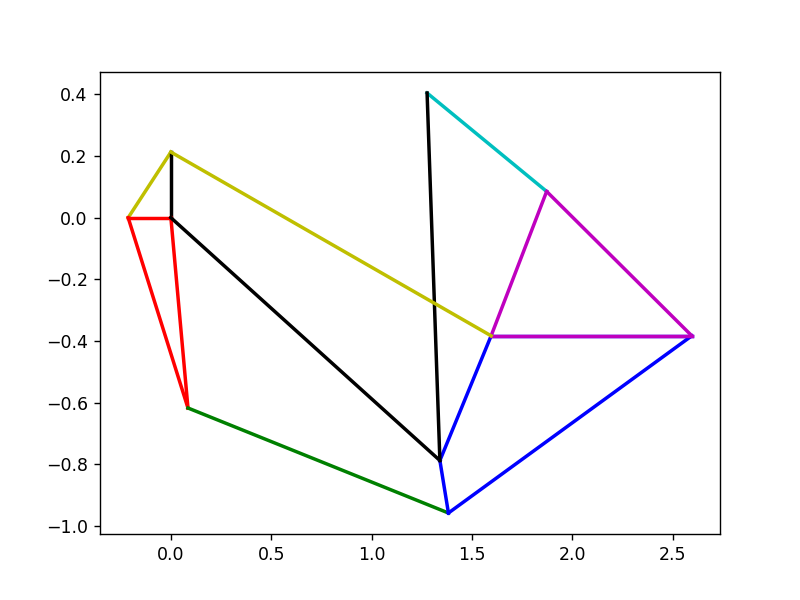

In [6]:
# Fish 1 Position 0 plot

o_muscle1x = np.real(o_muscle1[0] * np.exp(1j * o_muscle_ang1[0]))
o_muscle1y = np.imag(o_muscle1[0] * np.exp(1j * o_muscle_ang1[0]))
a01x = np.real(a01 * np.exp(1j * a0_ang1))
a01y = np.imag(a11 * np.exp(1j * a0_ang1))
a11x = np.real(a11 * np.exp(1j * a1_ang1[0]))
a11y = np.imag(a11 * np.exp(1j * a1_ang1[0]))
a21x = np.real(a21 * np.exp(1j * a2_ang1[0]))
a21y = np.imag(a21 * np.exp(1j * a2_ang1[0]))
    
a1x = np.real(a1 * np.exp(1j * a_ang1[0]))
a1y = np.imag(a1 * np.exp(1j * a_ang1[0]))
b1x = np.real(b1 * np.exp(1j * b_ang1[0]))
b1y = np.imag(b1 * np.exp(1j * b_ang1[0]))
c1x = np.real(c1 * np.exp(1j * c_ang1[0]))
c1y = np.imag(c1 * np.exp(1j * c_ang1[0]))
d1x = np.real(d1 * np.exp(1j * d_ang1))
d1y = np.imag(d1 * np.exp(1j * d_ang1))
    
e1x = np.real(e1 * np.exp(1j * e_ang1[0]))
e1y = np.imag(e1 * np.exp(1j * e_ang1[0]))
f1x = np.real(f1 * np.exp(1j * f_ang1[0]))
f1y = np.imag(f1 * np.exp(1j * f_ang1[0]))
g1x = np.real(g1 * np.exp(1j * g_ang1[0]))
g1y = np.imag(g1 * np.exp(1j * g_ang1[0]))
h1x = np.real(h1 * np.exp(1j * h_ang1))
h1y = np.imag(h1 * np.exp(1j * h_ang1))
    
m1x = np.real(m1 * np.exp(1j * m_ang1[0]))
m1y = np.imag(m1 * np.exp(1j * m_ang1[0]))
n1x = np.real(n1 * np.exp(1j * n_ang1[0]))
n1y = np.imag(n1 * np.exp(1j * n_ang1[0]))
r1x = np.real(r1 * np.exp(1j * r_ang1[0]))
r1y = np.imag(r1 * np.exp(1j * r_ang1[0]))
s1x = np.real(s1 * np.exp(1j * s_ang1[0]))
s1y = np.imag(s1 * np.exp(1j * s_ang1[0]))
    
l_quadr1x = np.real(l_quadr1 * np.exp(1j * l_quadr_ang1))
l_quadr1y = np.imag(l_quadr1 * np.exp(1j * l_quadr_ang1))
c_muscle1x = np.real(c_muscle1[0] * np.exp(1j * c_muscle_ang1[0]))
c_muscle1y = np.imag(c_muscle1[0] * np.exp(1j * c_muscle_ang1[0]))

plt.plot([a11x, a11x + o_muscle1x], [a11y, a11y + o_muscle1y], 'y', linewidth=2)
plt.plot([0, a01x], [0, a01y], 'k', linewidth=2)
plt.plot([0, a11x], [0, a11y], 'r', linewidth=2)
plt.plot([a11x, a11x + a21x], [a11y, a11y + a21y], 'r', linewidth=2)

plt.plot([0, a1x], [0, a1y], 'r', linewidth=2)
plt.plot([a1x, a1x + b1x], [a1y, a1y + b1y], 'g', linewidth=2)
plt.plot([d1x, d1x + c1x], [d1y, d1y + c1y], 'b', linewidth=2)
plt.plot([0, d1x], [0, d1y], 'k', linewidth=2)
   
plt.plot([d1x, d1x + e1x], [d1y, d1y + e1y], 'b', linewidth=2)
plt.plot([d1x + e1x, d1x + e1x + f1x], [d1y + e1y, d1y + e1y + f1y], 'm', linewidth=2)
plt.plot([d1x + h1x, d1x + h1x + g1x], [d1y + h1y, d1y + h1y + g1y], 'c', linewidth=2)
plt.plot([d1x, d1x + h1x], [d1y, d1y + h1y], 'k', linewidth=2)
    
plt.plot([d1x + c1x, d1x + c1x + m1x], [d1y + c1y, d1y + c1y + m1y], 'b', linewidth=2)
plt.plot([d1x + e1x, d1x + e1x + n1x], [d1y + e1y, d1y + e1y + n1y], 'b', linewidth=2)
plt.plot([d1x + e1x, d1x + e1x + r1x], [d1y + e1y, d1y + e1y + r1y], 'm', linewidth=2)
plt.plot([d1x + e1x + f1x, d1x + e1x + f1x + s1x], [d1y + e1y + f1y, d1y + e1y + f1y + s1y], 'm', linewidth=2)
    
plt.plot([a01x, a01x + c_muscle1x], [a01y, a01y + c_muscle1y], 'y', linewidth=2)
   
plt.show()

<IPython.core.display.Javascript object>


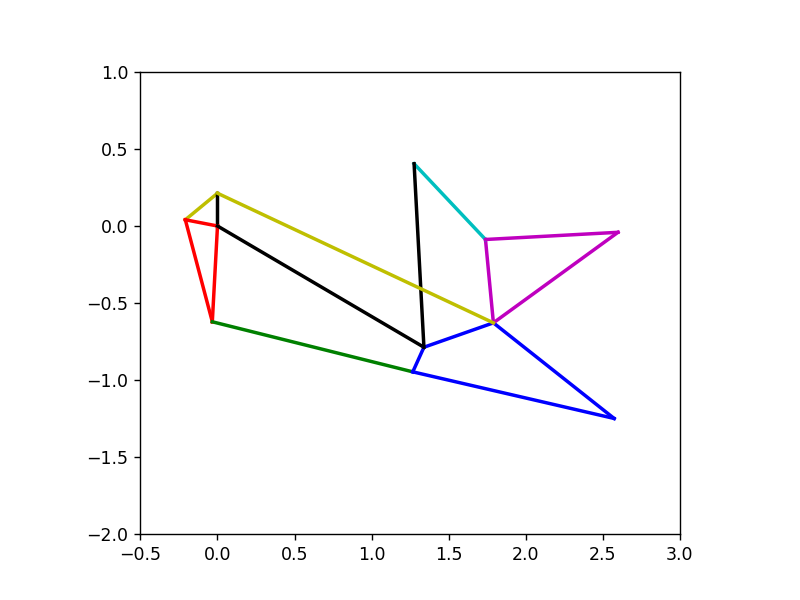

In [7]:
# Fish 1 Opening animation

fig, ax = plt.subplots()

def update(i):
    ax.clear()  # Clear the previous frame
    # Plot your data here
    o_muscle1x = np.real(o_muscle1[i] * np.exp(1j * o_muscle_ang1[i]))
    o_muscle1y = np.imag(o_muscle1[i] * np.exp(1j * o_muscle_ang1[i]))
    a01x = np.real(a01 * np.exp(1j * a0_ang1))
    a01y = np.imag(a11 * np.exp(1j * a0_ang1))
    a11x = np.real(a11 * np.exp(1j * a1_ang1[i]))
    a11y = np.imag(a11 * np.exp(1j * a1_ang1[i]))
    a21x = np.real(a21 * np.exp(1j * a2_ang1[i]))
    a21y = np.imag(a21 * np.exp(1j * a2_ang1[i]))
    
    a1x = np.real(a1 * np.exp(1j * a_ang1[i]))
    a1y = np.imag(a1 * np.exp(1j * a_ang1[i]))
    b1x = np.real(b1 * np.exp(1j * b_ang1[i]))
    b1y = np.imag(b1 * np.exp(1j * b_ang1[i]))
    c1x = np.real(c1 * np.exp(1j * c_ang1[i]))
    c1y = np.imag(c1 * np.exp(1j * c_ang1[i]))
    d1x = np.real(d1 * np.exp(1j * d_ang1))
    d1y = np.imag(d1 * np.exp(1j * d_ang1))
    
    e1x = np.real(e1 * np.exp(1j * e_ang1[i]))
    e1y = np.imag(e1 * np.exp(1j * e_ang1[i]))
    f1x = np.real(f1 * np.exp(1j * f_ang1[i]))
    f1y = np.imag(f1 * np.exp(1j * f_ang1[i]))
    g1x = np.real(g1 * np.exp(1j * g_ang1[i]))
    g1y = np.imag(g1 * np.exp(1j * g_ang1[i]))
    h1x = np.real(h1 * np.exp(1j * h_ang1))
    h1y = np.imag(h1 * np.exp(1j * h_ang1))
        
    m1x = np.real(m1 * np.exp(1j * m_ang1[i]))
    m1y = np.imag(m1 * np.exp(1j * m_ang1[i]))
    n1x = np.real(n1 * np.exp(1j * n_ang1[i]))
    n1y = np.imag(n1 * np.exp(1j * n_ang1[i]))
    r1x = np.real(r1 * np.exp(1j * r_ang1[i]))
    r1y = np.imag(r1 * np.exp(1j * r_ang1[i]))
    s1x = np.real(s1 * np.exp(1j * s_ang1[i]))
    s1y = np.imag(s1 * np.exp(1j * s_ang1[i]))
    
    l_quadr1x = np.real(l_quadr1 * np.exp(1j * l_quadr_ang1))
    l_quadr1y = np.imag(l_quadr1 * np.exp(1j * l_quadr_ang1))
    c_muscle1x = np.real(c_muscle1[i] * np.exp(1j * c_muscle_ang1[i]))
    c_muscle1y = np.imag(c_muscle1[i] * np.exp(1j * c_muscle_ang1[i]))

    plt.plot([a11x, a11x + o_muscle1x], [a11y, a11y + o_muscle1y], 'y', linewidth=2)
    plt.plot([0, a01x], [0, a01y], 'k', linewidth=2)
    plt.plot([0, a11x], [0, a11y], 'r', linewidth=2)
    plt.plot([a11x, a11x + a21x], [a11y, a11y + a21y], 'r', linewidth=2)

    plt.plot([0, a1x], [0, a1y], 'r', linewidth=2)
    plt.plot([a1x, a1x + b1x], [a1y, a1y + b1y], 'g', linewidth=2)
    plt.plot([d1x, d1x + c1x], [d1y, d1y + c1y], 'b', linewidth=2)
    plt.plot([0, d1x], [0, d1y], 'k', linewidth=2)
   
    plt.plot([d1x, d1x + e1x], [d1y, d1y + e1y], 'b', linewidth=2)
    plt.plot([d1x + e1x, d1x + e1x + f1x], [d1y + e1y, d1y + e1y + f1y], 'm', linewidth=2)
    plt.plot([d1x + h1x, d1x + h1x + g1x], [d1y + h1y, d1y + h1y + g1y], 'c', linewidth=2)
    plt.plot([d1x, d1x + h1x], [d1y, d1y + h1y], 'k', linewidth=2)
    
    plt.plot([d1x + c1x, d1x + c1x + m1x], [d1y + c1y, d1y + c1y + m1y], 'b', linewidth=2)
    plt.plot([d1x + e1x, d1x + e1x + n1x], [d1y + e1y, d1y + e1y + n1y], 'b', linewidth=2)
    plt.plot([d1x + e1x, d1x + e1x + r1x], [d1y + e1y, d1y + e1y + r1y], 'm', linewidth=2)
    plt.plot([d1x + e1x + f1x, d1x + e1x + f1x + s1x], [d1y + e1y + f1y, d1y + e1y + f1y + s1y], 'm', linewidth=2)
    
    plt.plot([a01x, a01x + c_muscle1x], [a01y, a01y + c_muscle1y], 'y', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim([-0.5, 3])
    plt.ylim([-2, 1])

# Create the animation
ani = FuncAnimation(fig, update, frames=len(a_ang1), repeat=False)

# Display the animation
plt.show()
    

<IPython.core.display.Javascript object>


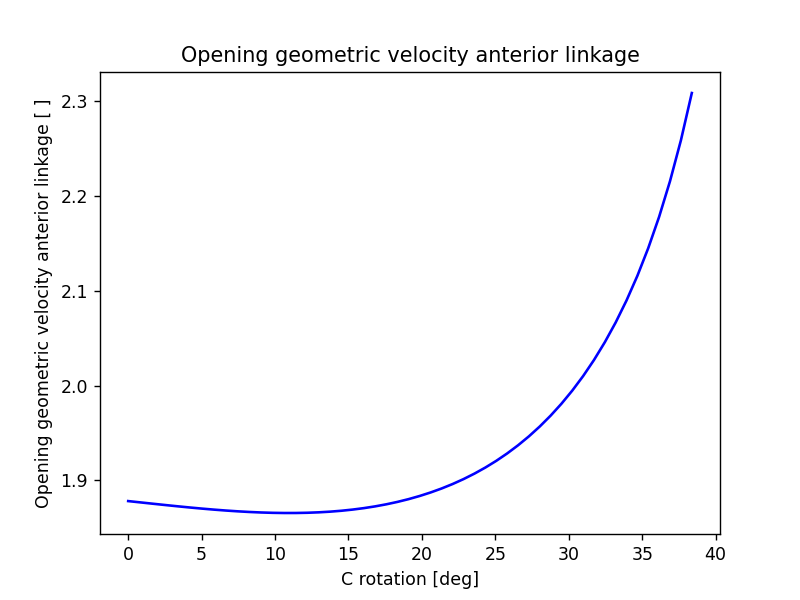

<IPython.core.display.Javascript object>


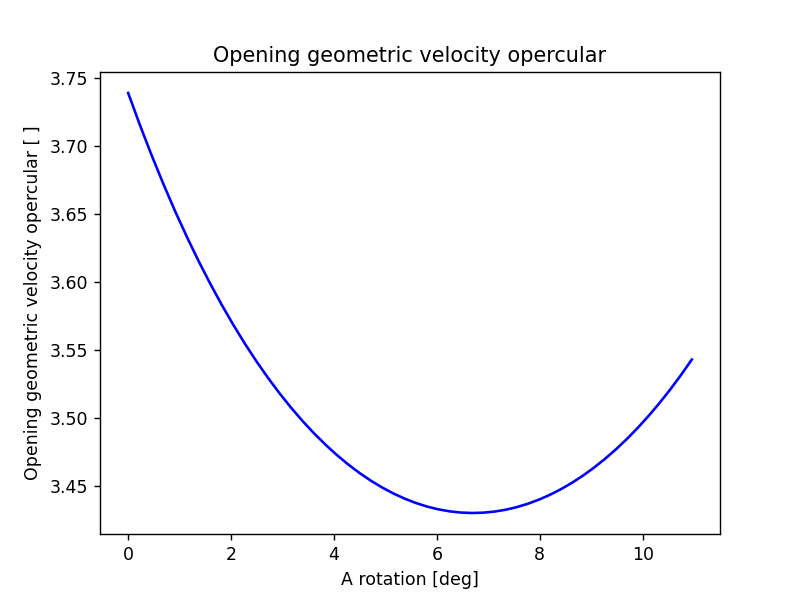

<IPython.core.display.Javascript object>


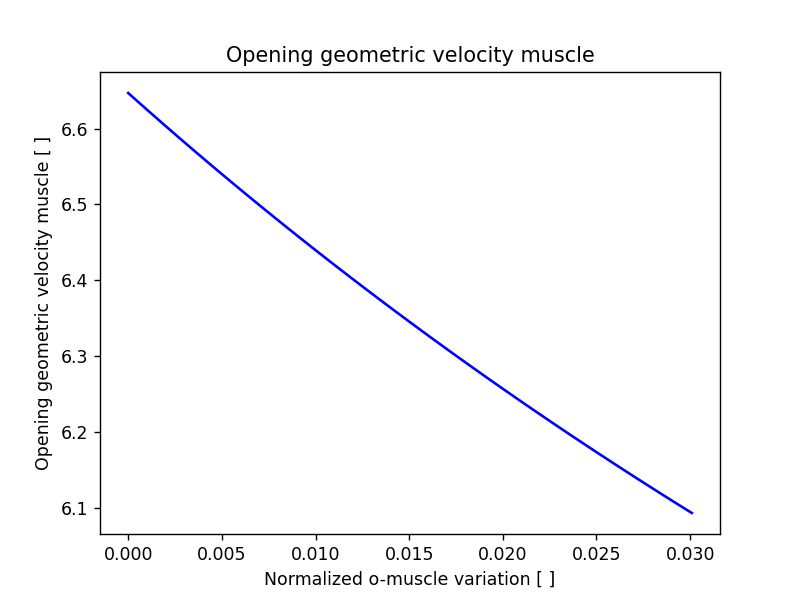

In [8]:
# Fish 1 mechanical parameters

# Anterior jaw linkage
o_geom_vel_anterior1 = -opening_vel1/c_ang_dot1

plt.figure()
plt.plot(-(c_ang1 - c_ang1[0])*conv, o_geom_vel_anterior1, 'b')
plt.title('Opening geometric velocity anterior linkage')
plt.xlabel('C rotation [deg]')
plt.ylabel('Opening geometric velocity anterior linkage [ ]')

# Opercular linkage
o_geom_vel_opercular1 = c_ang_dot1/a_ang_dot1

plt.figure()
plt.plot(-(a_ang1 - a_ang1[0])*conv, o_geom_vel_opercular1, 'b')
plt.title('Opening geometric velocity opercular')
plt.xlabel('A rotation [deg]')
plt.ylabel('Opening geometric velocity opercular [ ]')

# Jaw linkage
o_geom_vel_jaw1 = o_geom_vel_anterior1 * o_geom_vel_opercular1

# Muscle linkage

k_m1 = -(a_ang1-a_ang1[0])*conv

o_geom_vel_muscle1 = (a_ang_dot1/o_muscle_dot1)

plt.figure()
plt.plot(delta_o_muscle_norm1, o_geom_vel_muscle1, 'b')
plt.title('Opening geometric velocity muscle')
plt.xlabel('Normalized o-muscle variation [ ]')
plt.ylabel('Opening geometric velocity muscle [ ]')

plt.show()

<IPython.core.display.Javascript object>


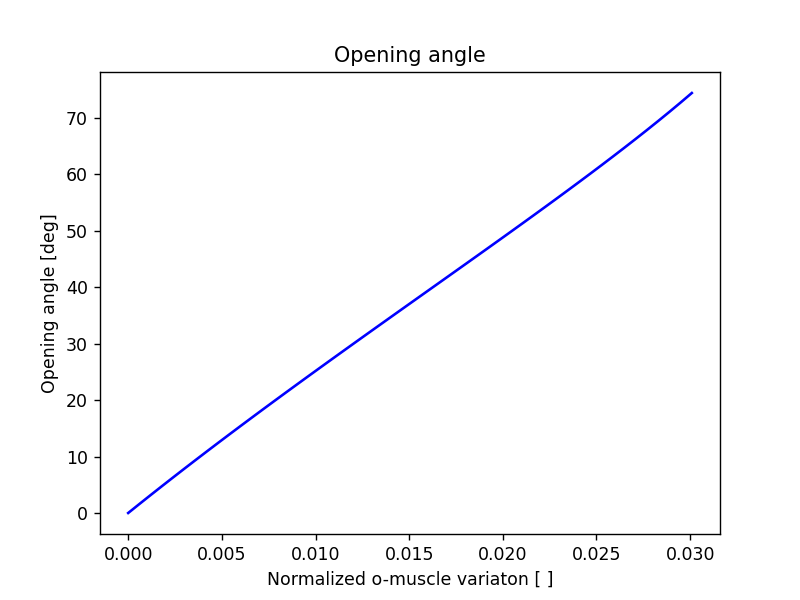

<IPython.core.display.Javascript object>


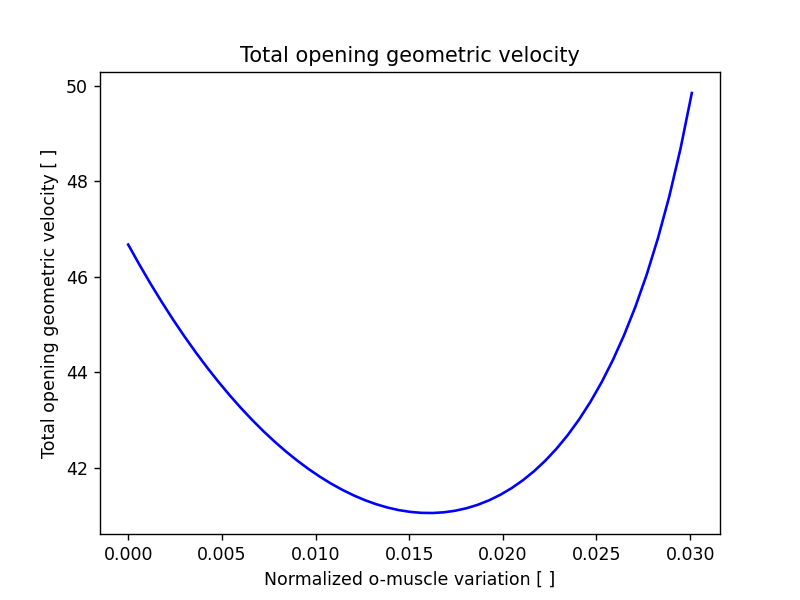

<IPython.core.display.Javascript object>


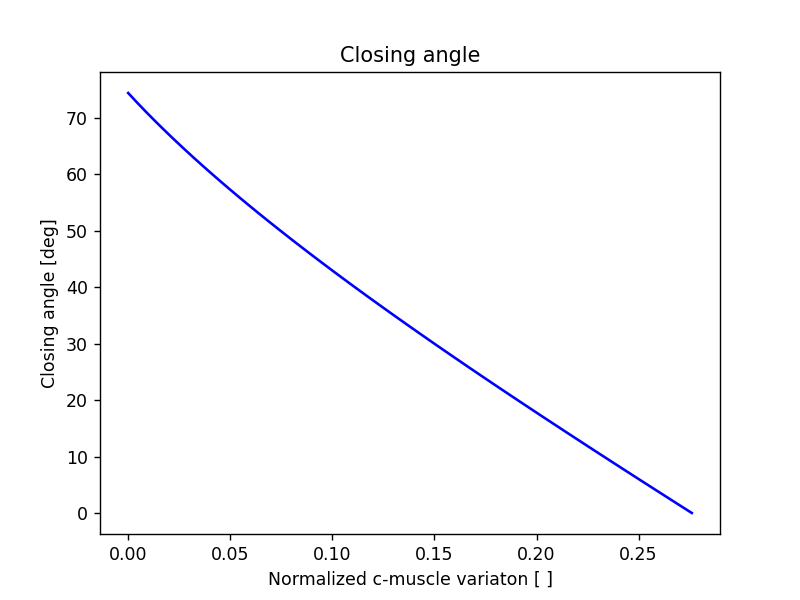

<IPython.core.display.Javascript object>


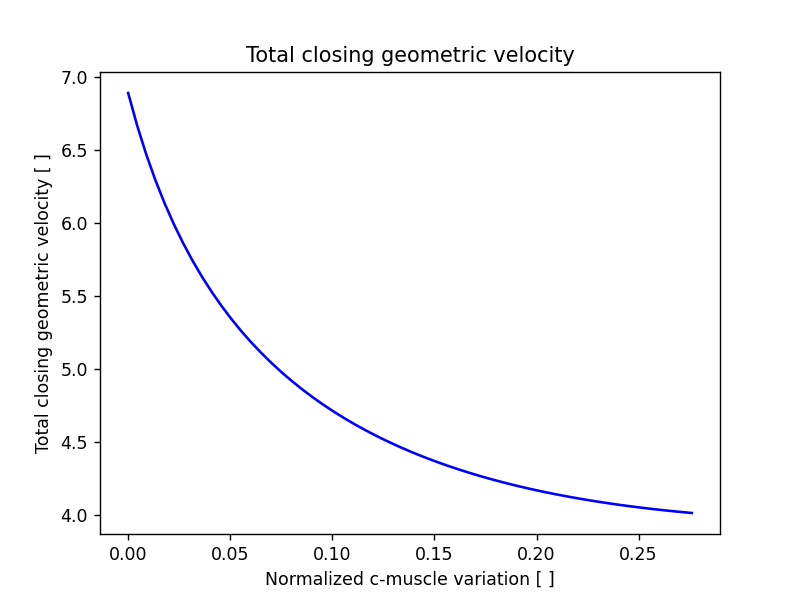

In [9]:
# Opening plot

plt.figure()
plt.plot(delta_o_muscle_norm1,(opening_ang1)*conv, 'b')
plt.title('Opening angle')
plt.xlabel('Normalized o-muscle variaton [ ]')
plt.ylabel('Opening angle [deg]')

plt.figure()
plt.plot(delta_o_muscle_norm1,opening_vel_norm1,'b')
plt.title('Total opening geometric velocity')
plt.xlabel('Normalized o-muscle variation [ ]')
plt.ylabel('Total opening geometric velocity [ ]')

# Closing plot

delta_c_muscle1 = (c_muscle1[-1]-c_muscle1)
delta_c_muscle_norm1 = delta_c_muscle1
c_contr1 = delta_c_muscle1/c_muscle1[-1]

c_muscle_dot1 = e1*e_ang_dot1*(np.cos(e_ang1)*np.sin(c_muscle_ang1)-np.sin(e_ang1)*np.cos(c_muscle_ang1))
c_muscle_ang_dot1 = (-np.sin(c_muscle_ang1)*c_muscle_dot1+e1*e_ang_dot1*np.cos(e_ang1))/(c_muscle1*np.cos(c_muscle_ang1))

plt.figure()
plt.plot(delta_c_muscle_norm1,(opening_ang1)*conv,'b')
plt.title('Closing angle')
plt.xlabel('Normalized c-muscle variaton [ ]')
plt.ylabel('Closing angle [deg]')

closing_vel_norm1 = (opening_vel1/c_muscle_dot1)

plt.figure()
plt.plot(delta_c_muscle_norm1,closing_vel_norm1,'b')
plt.title('Total closing geometric velocity')
plt.xlabel('Normalized c-muscle variation [ ]')
plt.ylabel('Total closing geometric velocity [ ]')

plt.show()

delta_c_muscle_neg1 = (c_muscle1[0]-c_muscle1)
delta_c_muscle_neg_norm1 = delta_c_muscle_neg1
c_contr_neg1 = delta_c_muscle_neg1/c_muscle1[-1]

<IPython.core.display.Javascript object>


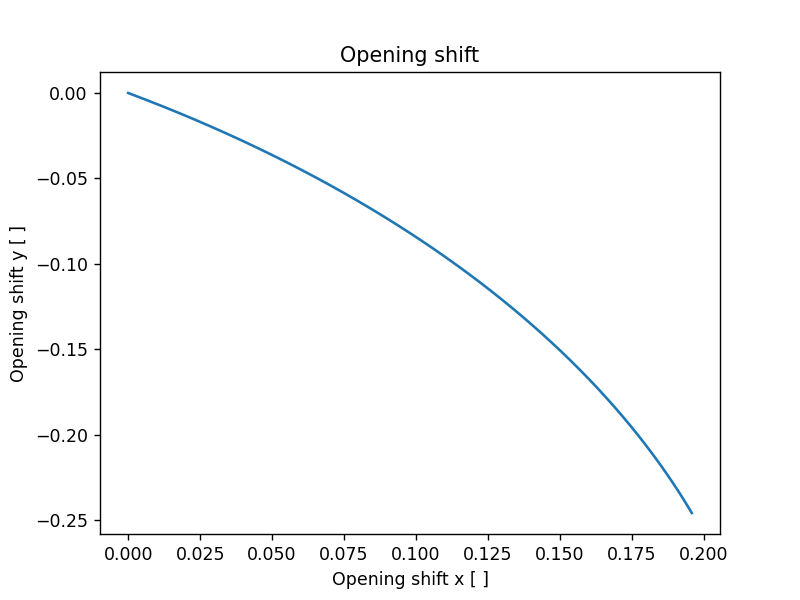

<IPython.core.display.Javascript object>


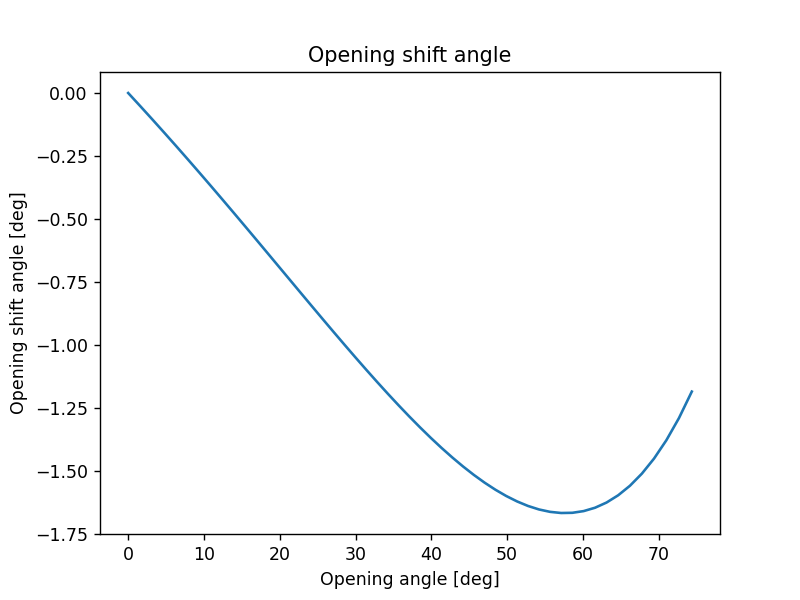

In [10]:
# Translation

trasl1x = np.real(d1*np.exp(1j*d_ang1)+e1*np.exp(1j*e_ang1))-np.real(d1*np.exp(1j*d_ang1)+e1*np.exp(1j*e_ang1[0]))
trasl1y=np.imag(d1*np.exp(1j*d_ang1)+e1*np.exp(1j*e_ang1))-np.imag(d1*np.exp(1j*d_ang1)+e1*np.exp(1j*e_ang1[0]))
trasl_ang1=((r_ang1+n_ang1)/2)-((r_ang1[0]+n_ang1[0]/2))

plt.figure()
plt.plot(trasl1x,trasl1y)
plt.title('Opening shift')
plt.xlabel('Opening shift x [ ]')
plt.ylabel('Opening shift y [ ]')
                             
plt.figure()
plt.plot((opening_ang1)*conv,trasl_ang1*conv)
plt.title('Opening shift angle')
plt.xlabel('Opening angle [deg]')
plt.ylabel('Opening shift angle [deg]')
                             
plt.show()

<IPython.core.display.Javascript object>


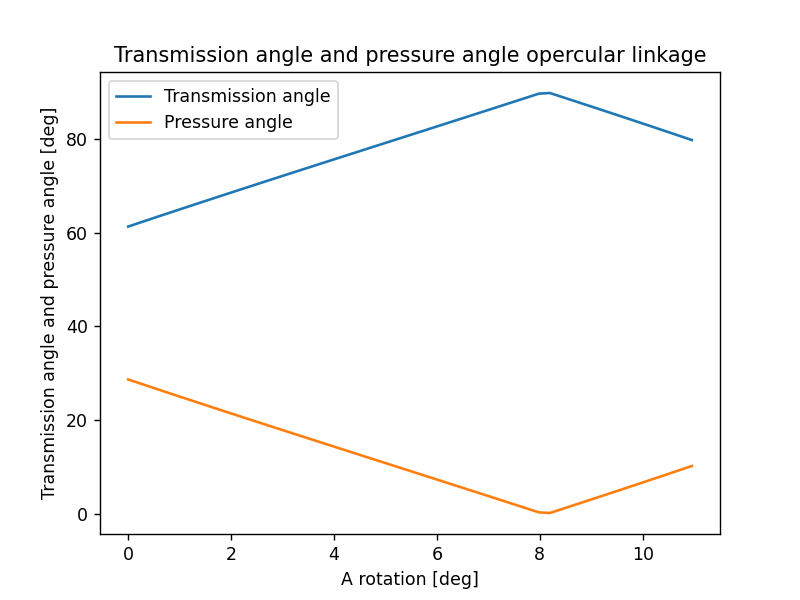

<IPython.core.display.Javascript object>


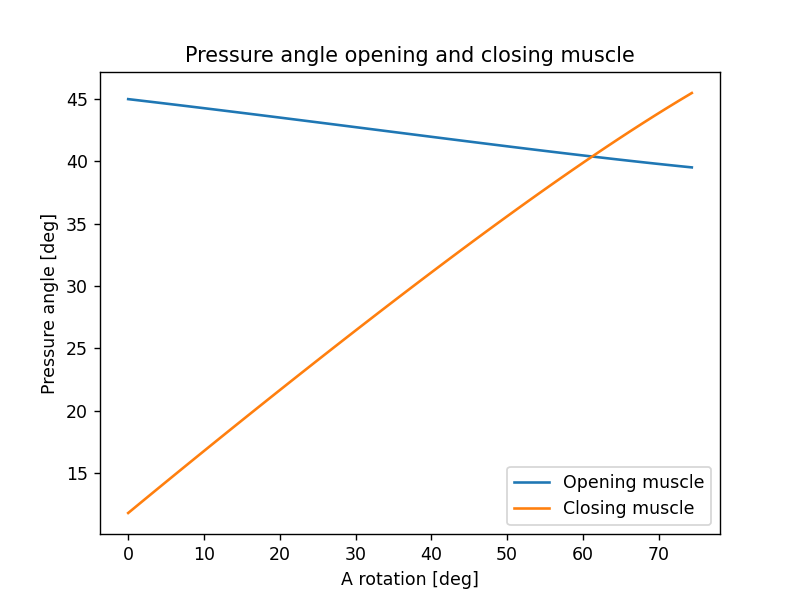

In [11]:
# Transmission angle

mi1 = (b_ang1+2*np.pi-c_ang1)*((b_ang1+2*np.pi-c_ang1)<np.pi/2)+(c_ang1-np.pi-b_ang1)*((b_ang1+2*np.pi-c_ang1)>np.pi/2)
theta1=np.pi/2-mi1

plt.figure()
plt.plot(-(a_ang1-a_ang1[0])*conv,mi1*conv, label = 'Transmission angle')
plt.plot(-(a_ang1-a_ang1[0])*conv,theta1*conv, label = 'Pressure angle')
plt.title('Transmission angle and pressure angle opercular linkage')
plt.xlabel('A rotation [deg]')
plt.ylabel('Transmission angle and pressure angle [deg]')
plt.legend()

# Pressure angle muscles

theta_o_muscle1 = np.abs(a1_ang1-np.pi/2-o_muscle_ang1)
theta_c_muscle1 = np.abs(c_muscle_ang1-e_ang1+5*np.pi/2)

plt.figure()
plt.plot(opening_ang1*conv,theta_o_muscle1*conv, label = 'Opening muscle')
plt.plot(opening_ang1*conv,theta_c_muscle1*conv, label = 'Closing muscle')
plt.title('Pressure angle opening and closing muscle')
plt.xlabel('A rotation [deg]')
plt.ylabel('Pressure angle [deg]')
plt.legend()

plt.show()

In [12]:
# Opening and closing velocities

o_vel_dim1 = opening_vel_norm1*o_muscle1[0]
c_vel_dim1 = closing_vel_norm1*c_muscle1[-1]

true_o_angular_vel1=65/40
true_c_angular_vel1=65/45

# Geometric velocity adimensional

opening_geometric_vel1 = -opening_vel1/a_ang_dot1
closing_geometric_vel1 = -opening_vel1/e_ang_dot1